PERFECT MATCH FOUND
Found "Peter_Lingaas*0918273645" in 169 iterations.
Finding solution took 0.443 seconds.
Score: 38148.97746433544


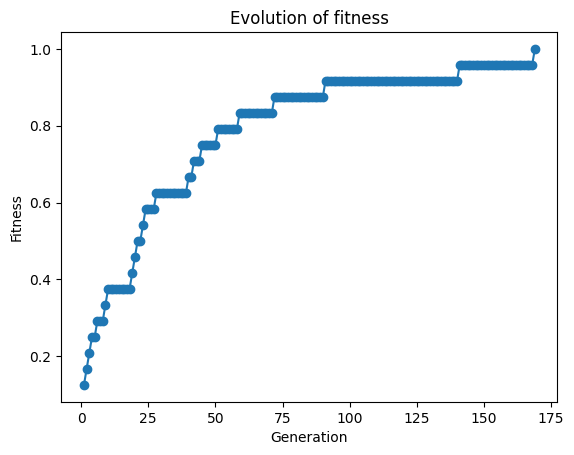

169

In [1]:
from random import random
from time import time
import matplotlib.pyplot as plt


class Individual:
    def __init__(self, string):
        self.string = string
        self.fitness = 0

    def computeFitness(self):
        global target
        fitness = 0

        # Compare letters to target string
        for i, char in enumerate(self.string):
            if char == target[i]:
                fitness += 1

        # Get ratio of correct letters
        fitness /= len(target)
        self.fitness = fitness

    def goal_met(self):
        return self.string == target


def ASCII_TO_CHAR(ascii_number):
    return chr(ascii_number)


def generate_random_gene():
    ascii_num = int(33 + random() * 94)
    return ASCII_TO_CHAR(ascii_num)
    # return pool[int(random() * len(pool))]


def goal_met():
    global population
    for individual in population:
        if individual.goal_met():
            return True


def computeFitness():
    global population
    for individual in population:
        individual.computeFitness()


def get_top_pop():
    global population
    population = sorted(
        population, key=lambda x: x.fitness, reverse=True
    )  # Sort from high to low
    return population[:n_population]


def applyCrossover():
    global p_crossover, population
    offsprings = []
    for i in range(1, len(population)):
        if random() > p_crossover:  # Continue if we should not apply crossover
            continue

        # Double point, pick two random points where the second point comes after the first one
        x1 = int(random() * genes * 0.5)
        x2 = x1 + int(random() * (genes - x1))

        # Get parents
        p1 = population[i - 1].string
        p2 = population[i].string

        # Create offsprings
        c1 = Individual(p1[:x1] + p2[x1:x2] + p1[x2:])
        c2 = Individual(p2[:x1] + p1[x1:x2] + p2[x2:])

        # Store until were done
        offsprings.append(c1)
        offsprings.append(c2)

    population = population + offsprings


def applyMutation():
    global p_mutation, population

    for individual in population:
        for j in range(genes):
            if random() > p_mutation:  # Continue if we should not apply mutation
                continue
            individual.string = (
                individual.string[:j]
                + generate_random_gene()
                + individual.string[j + 1 :]
            )


# Not really elitism as it simply copies the population
def applyElitism():
    for i in range(1, len(population)):
        population[i] = population[0]


points = []


def runGA():
    t0 = time()
    global population
    # Generate initial population
    for i in range(n_population):
        population[i] = Individual("0" * genes)

    # Compute population fitness
    iterations = 0
    fitnessdata = []
    x = []
    while iterations < iter_max:
        applyCrossover()
        applyMutation()
        computeFitness()
        population = get_top_pop()
        applyElitism()
        iterations += 1
        x.append(iterations)
        fitnessdata.append(population[0].fitness)
        if goal_met():
            print("PERFECT MATCH FOUND")
            break
    t1 = time()
    print(f'Found "{population[0].string}" in {iterations} iterations.')
    print(f"Finding solution took {round(t1-t0, 3)} seconds.")
    print(f"Score: {iterations*n_population/(t1-t0)}")
    plt.plot(x, fitnessdata, marker="o")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Evolution of fitness")
    plt.show()
    return iterations


target = "Peter_Lingaas*0918273645"
n_population = 100
genes = len(target)
p_crossover = 0.8
p_mutation = 0.1
population = [None] * n_population
iter_max = 500

runGA()
